In [ ]:
from typing_extensions import Self

from manim import *
import numpy as np

In [ ]:
%%manim --format=gif -ql -v WARNING Shape1  

class Shape1(Scene):
    def construct(self):
        shape = VGroup()
        shape.add(Triangle(), Square())
        shape.scale(0.5)
        self.play(Create(shape))


In [ ]:
%%manim --format=gif -ql -v WARNING Shape2

class Shape2(Scene):
    def construct(self):
        shape = VGroup(Triangle(), Square(), Text("yo", font_size=25, color=BLUE))
        shape.scale(0.5)
        self.play(Create(shape))
        self.wait(0.5)
        self.play(FadeOut(shape))

In [ ]:
class CircleText(VGroup):
    def __init__(self, content):
        super().__init__()
        self.circle = Circle()
        self.content = content
        self.add(self.circle, content)
        content.move_to(self.circle.get_center())

    def clear_content(self):
        self.remove(self.content)
        self.content = None

    @override_animate(clear_content)
    def _clear_content_animation(self, anim_args=None):
        if anim_args is None:
            anim_args = {}
        anim = Uncreate(self.content, **anim_args)
        self.clear_content()
        return anim


In [ ]:
%%manim --format=gif -ql -v WARNING Shape3

class Shape3(Scene):
    def construct(self):
        shape = CircleText(Text("hello"))
        self.play(FadeIn(shape))
        self.play(shape.animate.clear_content())


In [ ]:
%%manim --format=gif -ql -v WARNING Shape4

def convert_to_binary(bits, number):
    binary_text = ""
    overflow_text = ""

    if number is None:
        return overflow_text, binary_text

    if number >= 0:
        while bits != 0:
            binary_text = str(number % 2) + binary_text
            number = number // 2
            bits = bits - 1
    else:
        NotImplemented("Not implemented number < 0")

    if number > 0:
        while number != 0:
            overflow_text = str(number % 2) + overflow_text
            number = number // 2
    elif number < 0:
        NotImplemented("Not implemented number < 0")

    return overflow_text, binary_text


class OLDMBits(VGroup):
    _overflow_text: str
    _binary_text: str
    _bits: int
    _show_binary: bool
    _number: int
    group_overflow: VGroup
    group_binary: VGroup
    group_overflow_bound: VGroup
    group_binary_bound: VGroup

    def __init__(self, number: int = None, bits=1, show_overflow=False, show_binary: bool = True,
                 show_binary_bound: bool = True, show_overflow_bound: bool = False):
        super().__init__()
        self._overflow_text, self._binary_text = convert_to_binary(bits, number)
        self._bits = bits
        self._show_overflow = show_overflow
        self._number = number
        self._show_binary = show_binary
        self.show_binary_bound = show_binary_bound
        self.show_overflow_bound = show_overflow_bound

        self.group_overflow = VGroup()
        self.group_binary = VGroup()
        self.group_overflow_bound = VGroup()
        self.group_binary_bound = VGroup()

        self.__update__()

    @property
    def number(self):
        return self._number

    @number.setter
    def number(self, new_number: int) -> None:
        self._overflow_text, self._binary_text = convert_to_binary(self._bits, new_number)

    @property
    def bits(self):
        return self._bits

    def __update_overflow__(self):

        if self.group_overflow is not None:
            self.remove(self.group_overflow)
            self.group_overflow.clear_points()

        if not self._show_overflow:
            return

        for index, char in enumerate(self._overflow_text):
            dig = Text(char)
            dig.shift((index, -0.5, 0))
            self.group_overflow.add(dig)

        self.group_overflow.shift((-len(self._overflow_text) + 0.5, 0, 0))
        self.add(self.group_overflow)

    def __update_binary__(self):
        if self.group_binary is not None:
            self.remove(self.group_binary)
            self.group_binary.clear_points()

        if not self._show_binary:
            return

        if self._number is not None:
            for index, char in enumerate(self._binary_text):
                dig = Text(char)
                dig.shift((0.5 + index, -0.5, 0))
                self.group_binary.add(dig)
        self.add(self.group_binary)

    def __update_binary_bound(self):
        if self.group_binary_bound is not None:
            self.remove(self.group_binary_bound)
            self.group_binary_bound.clear_points()

        if not self.show_binary_bound:
            return

        line_left = Line(np.zeros(3, dtype=np.float32), DOWN)
        line_bot = Line(DOWN, DOWN + RIGHT * self._bits)
        line_right = Line(DOWN + RIGHT * self._bits, DOWN + RIGHT * self._bits + UP)
        line_top = Line(DOWN + RIGHT * self._bits + UP, np.zeros(3, dtype=np.float32))
        self.group_binary_bound.add(line_left, line_bot, line_right, line_top)
        for i in range(1, self._bits):
            self.group_binary_bound.add(Line(RIGHT * i, RIGHT * i + DOWN))

        self.add(self.group_binary_bound)

    def __update_overflow_bound(self):
        if self.group_binary_bound is not None:
            self.remove(self.overflow_bound)
            self.overflow_bound.clear_points()

        if not self.show_overflow_bound:
            return

        NotImplemented("show_overflow_bound not yet implemented")

    def __update__(self):

        self.__update_binary_bound()
        self.__update_overflow__()
        self.__update_binary_bound()
        self.__update_binary__()

    def move_to_center(self):
        self.move_to(np.zeros(3, dtype=float))

    def __remove_all__(self):
        if self._show_binary:
            self.remove(self.group_binary)
        if self._show_overflow:
            self.remove(self.group_overflow)
        if self.show_binary_bound:
            self.remove(self.group_binary_bound)
        if self.show_overflow_bound:
            self.remove(self.group_overflow_bound)

    def toggle_overflow(self):
        self._show_overflow = not self._show_overflow
        self.__update_overflow__()


class Shape4(Scene):
    def construct(self):
        shape = OLDMBits(bits=8, number=1200, show_overflow=True)
        shape.scale(0.5)
        self.play(Create(shape))
        self.play(FadeOut(shape))
        shape.toggle_overflow()
        self.play(Create(shape))
        self.play(FadeOut(shape))
        shape.toggle_overflow()
        self.play(Create(shape))
        self.play(FadeOut(shape))






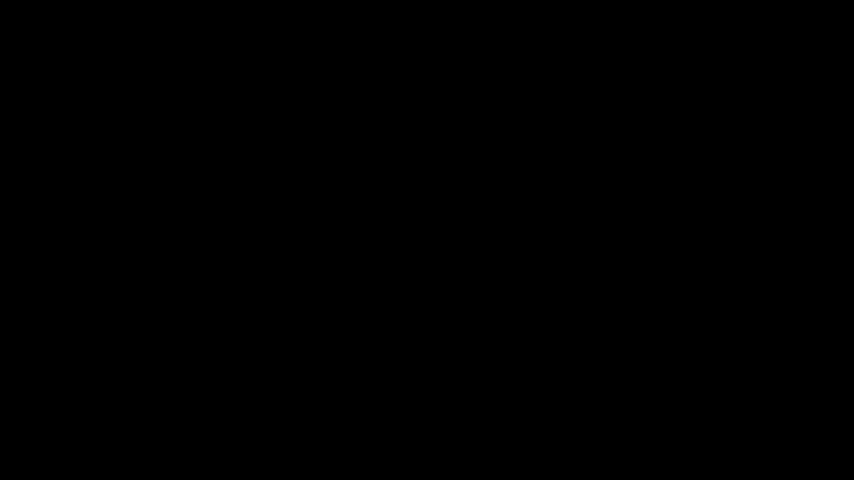

In [420]:
%%manim --format=gif -ql -v WARNING Shape5

def convert_to_binary(bits, number):
    binary_text = ""
    overflow_text = ""

    if number is None:
        return overflow_text, binary_text

    if number >= 0:
        while bits != 0:
            binary_text = str(number % 2) + binary_text
            number = number // 2
            bits = bits - 1
    else:
        NotImplemented("Not implemented number < 0")

    if number > 0:
        while number != 0:
            overflow_text = str(number % 2) + overflow_text
            number = number // 2
    elif number < 0:
        NotImplemented("Not implemented number < 0")

    return overflow_text, binary_text


class MBits(Polygon):
    overflow_text: VGroup
    binary_text: VGroup

    def __init__(
            self,
            color: ParsableManimColor = GRAY,
            bits: int = 1,
            number: int | None = None,
            show_overflow: bool = False,
            **kwargs,
    ):
        super().__init__(UR, UL, DL, DR, color=color, **kwargs)
        self.overflow, self.binary = convert_to_binary(bits, number)


        width = bits
        height = 1
        self.stretch_to_fit_width(width)
        self.stretch_to_fit_height(height)
        self._number = number
        self._bits = bits
        self.set_color = color

        v = self.get_vertices()
        self.sep = VGroup()

        for i in range(1, bits):
            self.sep.add(Line(v[1] + (i, 0, 0), v[1] + (i, 0, 0) + DOWN, color=color))

        if self.sep:
            self.add(self.sep)

        self.text = Text(show_overflow and self.overflow + self.binary or self.binary,color=color).align_to(self, RIGHT)
        

        for index, char in enumerate(self.text.submobjects.__reversed__()):
            char.move_to(v[3] - (index + 0.5, -0.5, 0))

        self.add(self.text)
        self.move_to(np.zeros(3,dtype=float)) # move to center

    @property
    def number(self):
        return self._number

    @number.setter
    def number(self, value):
        self._number = value
        self.overflow, self.binary = convert_to_binary(self._bits, self._number)

    @property
    def bits(self):
        return self._bits

    def __generate_dynamic_text(self, v3):

        temp = Text(self.show_overflow and self.overflow + self.binary or self.binary).align_to(self, RIGHT)

        for index, char in enumerate(temp.submobjects.__reversed__()):
            char.move_to(v3 - (index + 0.5, -0.5, 0))

        return temp


class Shape5(Scene):
    def construct(self):
        shape = MBits(bits=8, number=1200, show_overflow=True)
        shape1 = MBits(bits=8, number=1200, show_overflow=False)
        
        shape1.align_to(shape,RIGHT)

        self.play(Create(shape))

        self.wait(2)

        shape.show_overflow = False
        self.wait(2)
        self.play(FadeOut(shape),FadeIn(shape1))
        self.wait(2)

